In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pprint 
pp = pprint.PrettyPrinter(indent=4)
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils import np_utils, to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense

# CIFAR 10 Dataset

CIFAR-10 is a dataset of 60,000 color images (32 by 32 resolution) across 10 classes (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck). The train/test split is 50k/10k.

In [ ]:
# !pip install tensorflow

In [188]:
from tensorflow.keras.datasets import cifar10
(x_dev, y_dev), (x_test, y_test) = cifar10.load_data()

In [189]:
LABELS = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

2.1 Plot 5 samples from each class/label from train set on a 10*5 subplot

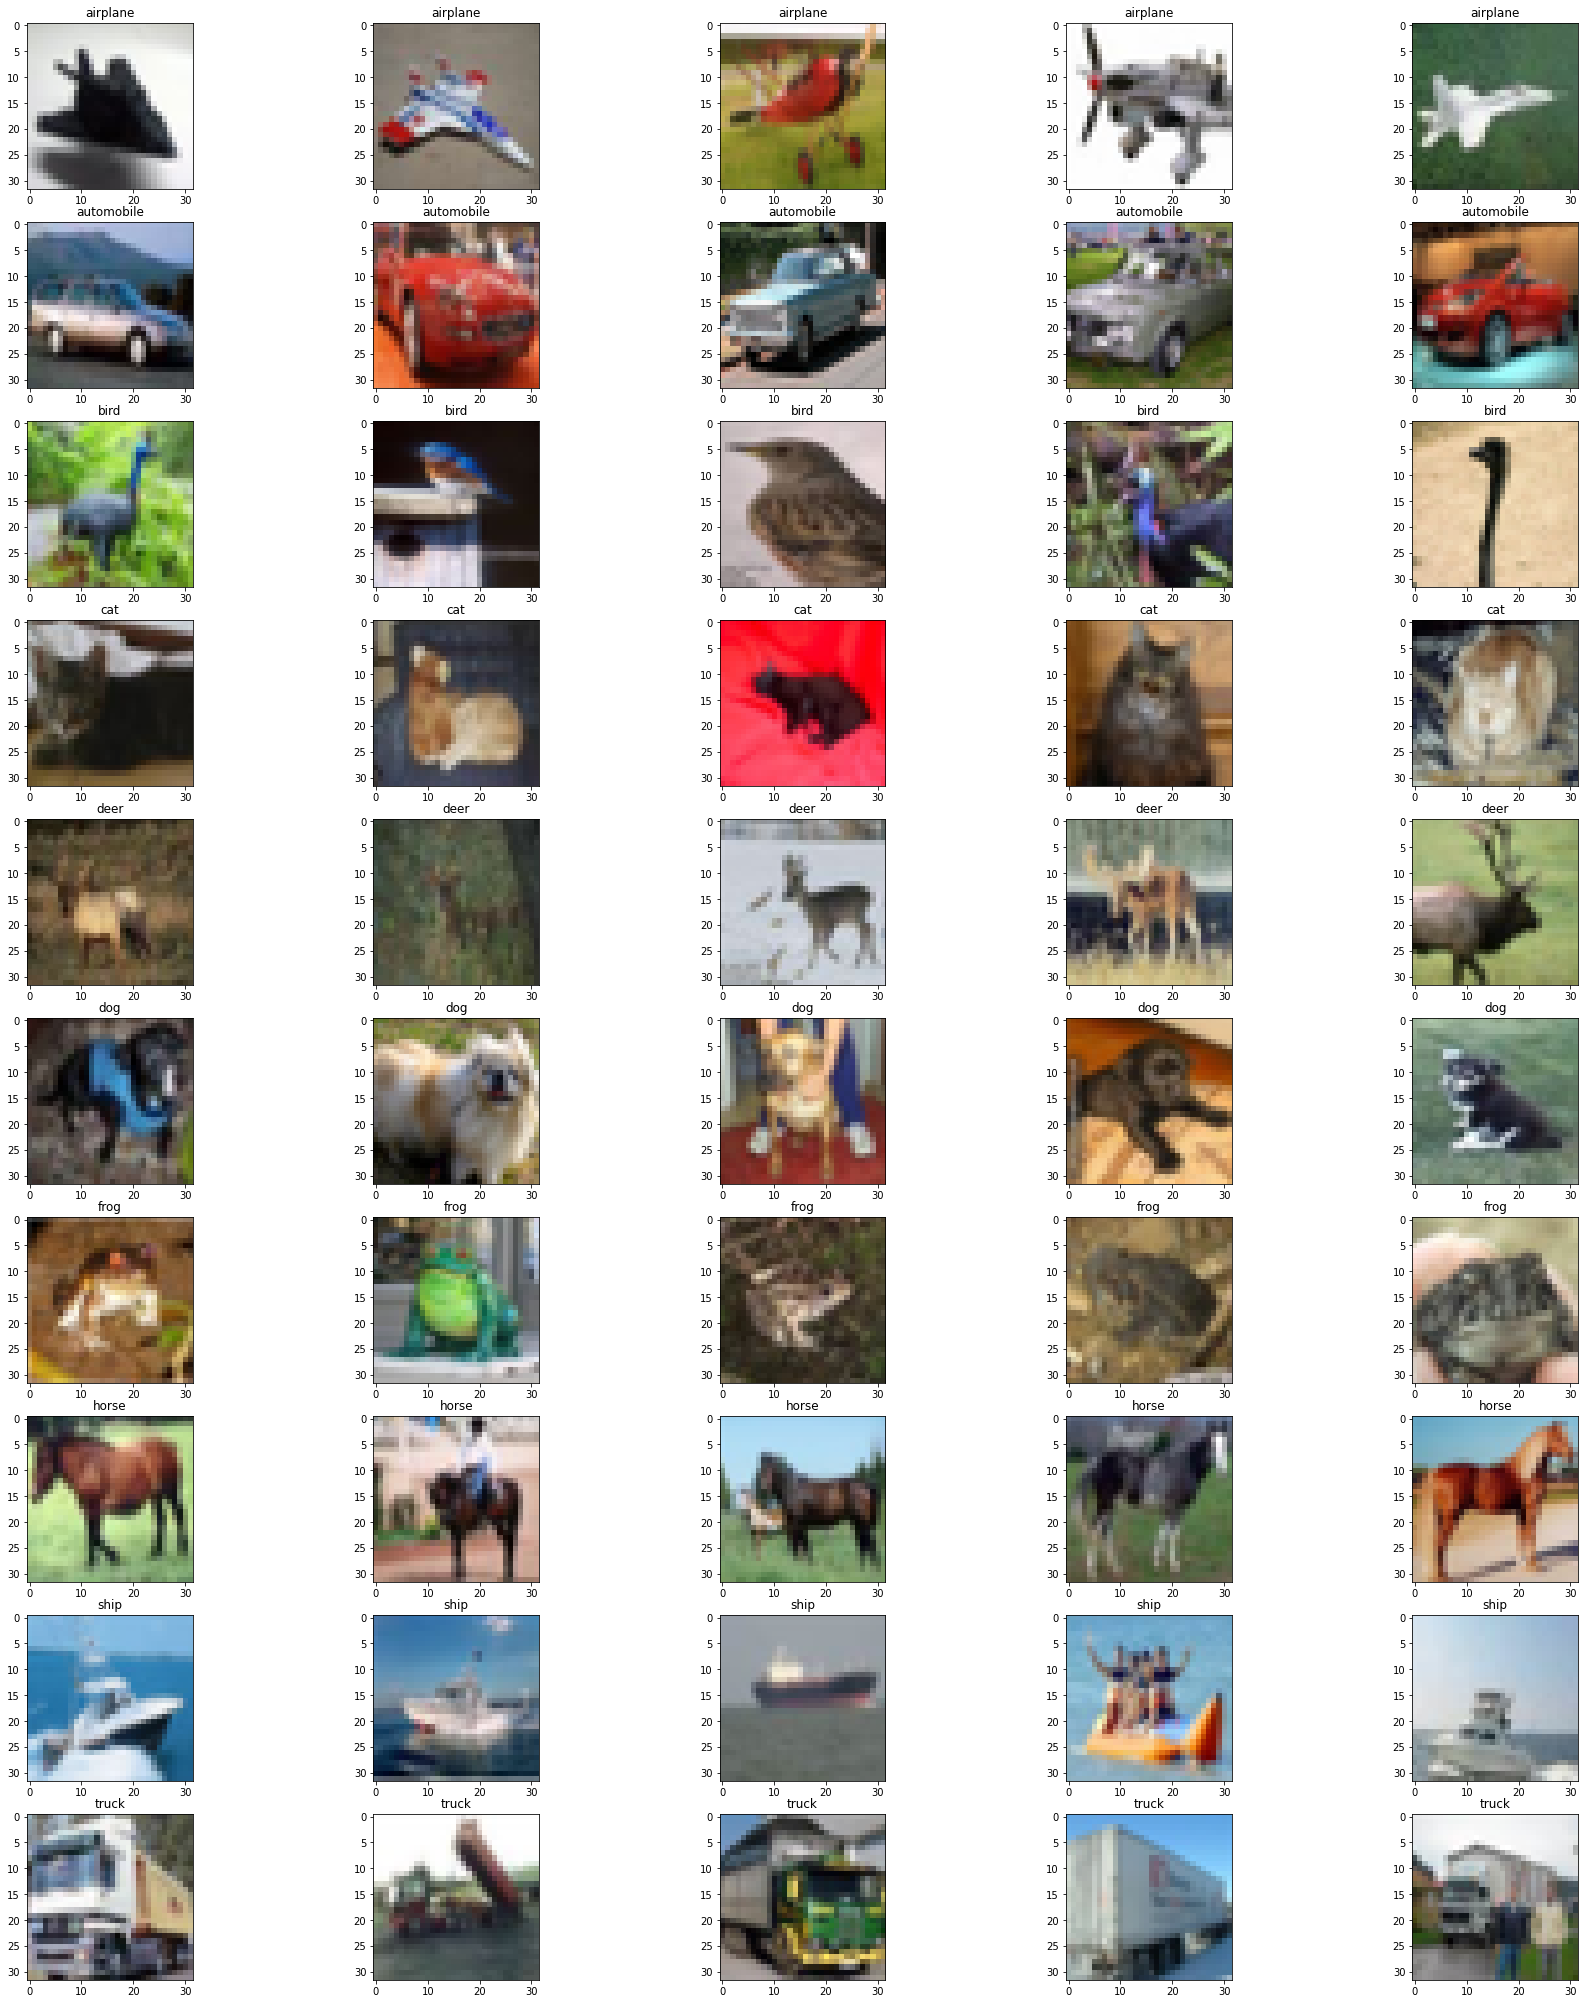

In [190]:
fig = plt.figure(figsize=(30,36))

x_classes = []


for i in range(len(LABELS)):
    iloc = y_dev[:0] == i
    iloc = np.where(y_dev == i)
    y_iloc = iloc[0]
    x_class = x_dev[y_iloc[:5]]
    x_classes.append(x_class)


for i in range(len(LABELS)):
    for j in range(5):
        ax = plt.subplot2grid((10,5), (i,j))
        ax.imshow(x_classes[i][j])
        ax.set_title(LABELS[i])
plt.show()



2.2  Preparing the dataset for CNN 

1) Print the shapes - $x_{dev}, y_{dev},x_{test},y_{test}$

2) Flatten the images into one-dimensional vectors and again print the shapes of $x_{dev}$,$x_{test}$

3) Standardize the development and test sets.

4) Train-test split development set into train and validation sets (8:2 ratio).

In [191]:
# 1) Print the shapes
print('Shape of x_dev: ', x_dev.shape)
print('Shape of y_dev: ', y_dev.shape)
print('Shape of x_test: ', x_test.shape)
print('Shape of y_test: ', y_test.shape)

# 2) Flatten the images into one-dimensional vectors and again print the shapes of  𝑥𝑑𝑒𝑣 , 𝑥𝑡𝑒𝑠𝑡
x_dev = x_dev.flatten().reshape( 50000, 32*32*3)
x_test = x_test.flatten().reshape(10000, 32*32*3)

print('Flattened shape of x_dev is: ', x_dev.shape)
print('Flattened shape of x_test is: ', x_test.shape)

# 3) Standardize the development and test sets.
x_dev = x_dev / 255
x_test =  x_test / 255
num_classes = 10
y_dev = np_utils.to_categorical(y_dev,num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)


#  Train-test split development set into train and validation sets (8:2 ratio).
x_train, x_val, y_train, y_val = train_test_split(x_dev, y_dev, test_size=0.2, random_state = 42)

# print(len(x_dev), len(x_test))

Shape of x_dev:  (50000, 32, 32, 3)
Shape of y_dev:  (50000, 1)
Shape of x_test:  (10000, 32, 32, 3)
Shape of y_test:  (10000, 1)
Flattened shape of x_dev is:  (50000, 3072)
Flattened shape of x_test is:  (10000, 3072)


2.3 Build the feed forward network 

First hidden layer size - 128

Second hidden layer size - 64

Third and last layer size - 10


In [105]:
model = Sequential([Dense(128, input_shape=(32*32*3,), activation='relu'),
                    Dense(64, activation='relu'),
                    Dense(10, activation='softmax')])

2.4) Print out the model summary. Can show show the calculation for each layer for estimating the number of parameters

In [37]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               393344    
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 402,250
Trainable params: 402,250
Non-trainable params: 0
_________________________________________________________________


In [107]:
print('calculations for each layer: ')

first = 128*(32*32*32 + 1)
sec = 64 * 129
third = 10 * 65

print ('first:', first, 'sec:', sec, 'third:', third)

calculations for each layer: 
first: 4194432 sec: 8256 third: 650


2.5) Is number dependent on the image height and width? 

They are dependent since the num of parameters for the first layer depends on the layer size, which correlate to height and width.
Moreover, the results for the second layer and third layer also depend on the input size.

**Printing out model's output on first train sample. This will confirm if dimensions are correctly set up. The sum of this output equal to 1 upto two decimal places?**

In [110]:
model.compile()
output = model.predict(x_train[0].reshape(1,-1))

print("Output: {:.2f}".format(sum(output[0])))

1/1 [==============================] - 0s 62ms/step
Output: 1.00


2.6) Using the right metric and  the right loss function, with Adam as the optimizer, train the model for 20 epochs with batch size 128.

In [ ]:
model.compile("adam",
              "categorical_crossentropy",
              metrics = ["accuracy"])

# train model for 20 epochs with batch size 128
trained_model = model.fit(
              x_train, y_train, epochs = 20, batch_size = 128, verbose = 1, validation_data=(x_val, y_val) 
              )

2.7) Plot a separate plots for:

a. displaying train vs validation loss over each epoch

b. displaying train vs validation accuracy over each epoch 

Text(0.5, 1.0, 'Train vs. validation accuracy over each epoch')

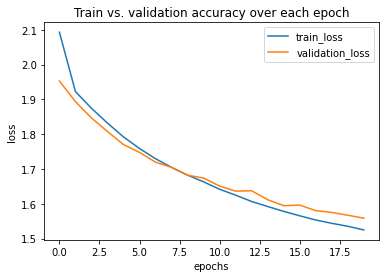

In [112]:
hist = pd.DataFrame(trained_model.history)
fig,ax = plt.subplots()
ax.plot(hist.index, hist["loss"],label="train_loss")
ax.plot(hist.index, hist["val_loss"], label = "validation_loss")
ax.set_ylabel("loss")
ax.set_xlabel("epochs")
ax.legend()
ax.set_title("Train vs. validation accuracy over each epoch")


Text(0.5, 1.0, 'Train vs. validation accuracy over each epoch')

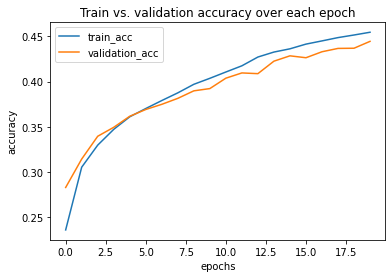

In [113]:
hist = pd.DataFrame(trained_model.history)

fig,ax2 = plt.subplots()
ax2.plot(hist.index, hist['accuracy'],label="train_acc")
ax2.plot(hist.index, hist['val_accuracy'], label = "validation_acc")
ax2.set_ylabel('accuracy')
ax2.set_xlabel("epochs")
ax2.legend()
ax2.set_title("Train vs. validation accuracy over each epoch")

2.8) Finally, report the metric chosen on test set.

In [114]:
score = model.evaluate(x_test, y_test, verbose=0)

print("Test loss: {:.3f}".format(score[0]))
print("Test accuracy: {:.3f}".format(score[1]))

Test loss: 1.539
Test accuracy: 0.452


2.9 If the accuracy achieved is quite less(<50%), try improve the accuracy 

In [ ]:
imp_model = Sequential([Dense(128, input_shape=(32*32*3,), activation='relu'),
                    Dense(64, activation='relu'),
                    Dense(10, activation='softmax')])

imp_model.compile(optimizer = "RMSprop",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

# # train model for 20 epochs with batch size 128
trained_imp_model = imp_model.fit(
              x_train, y_train, epochs = 30, batch_size = 128, verbose = 1, validation_data=(x_val, y_val) 
              )



In [122]:
imp_score = imp_model.evaluate(x_test, y_test, verbose=0)

print("Test loss: {:.3f}".format(imp_score[0]))
print("Test accuracy: {:.3f}".format(imp_score[1]))

## The accuracy is improved to 0.56 > 0.5 by chaning optimizer = "RMSprop" and increasing epochs = 30

Test loss: 1.409
Test accuracy: 0.506


2.10 Plot the first 50 samples of test dataset on a 10*5 subplot and this time label the images with both the ground truth (GT) and predicted class (P).

2/2 [==============================] - 0s 7ms/step


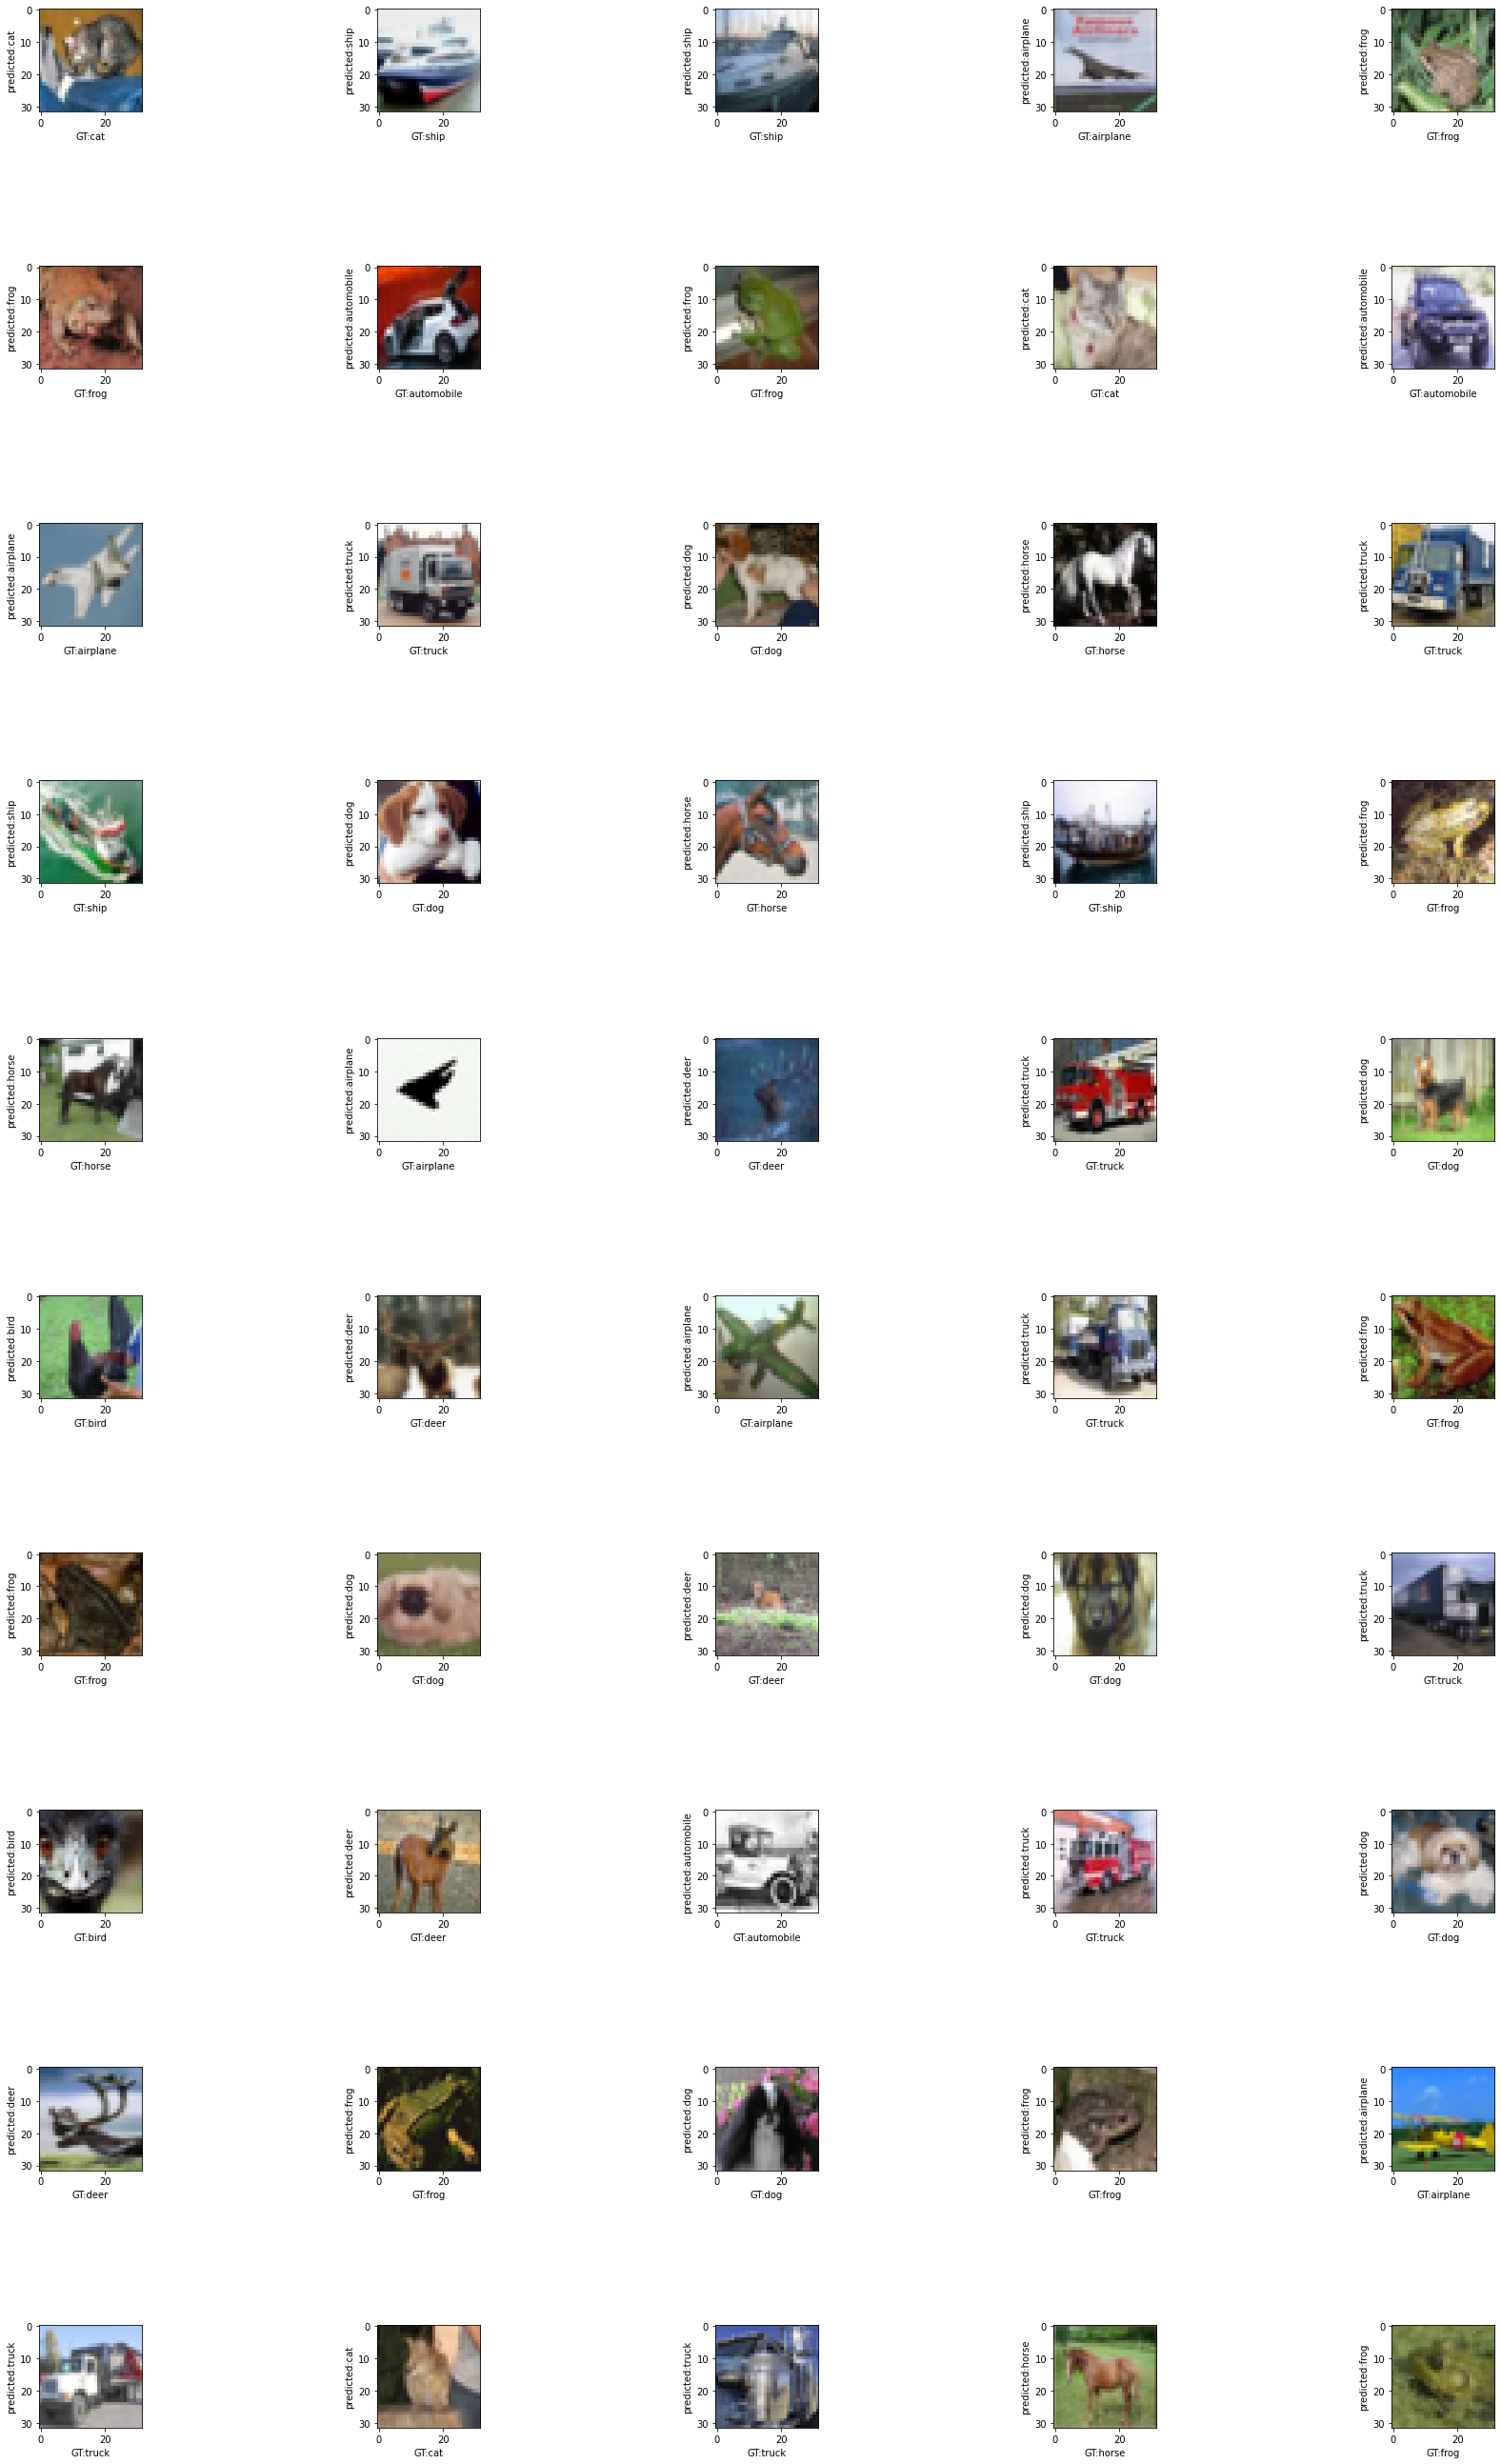

In [193]:
from tensorflow.keras.datasets import cifar10
# (x_dev, y_dev), (x_test, y_test) = cifar10.load_data()
(x_dev_img, y_dev_img), (x_test_img, y_test_img) = cifar10.load_data()


y_pred = imp_model.predict(x_test[:50])

y_pred_labels = y_pred.argmax(axis = 1) #print(y_pred_labels)
y_test_labels = np.ravel(y_test_img)


fig = plt.figure(figsize=(30, 36))

k = 0
for i in range(10):
  for j in range(5):
    ax = plt.subplot2grid((10,5), (i,j))
    ax.imshow(x_test_img[k])
    x_label = 'GT:'+ LABELS[int(y_test_img[k])] ## test labels are float, convert to integer 
    y_label = 'predicted:'+ LABELS[y_test_labels[k]] 
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    k += 1
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.4)

# PART 3 Convolutional Neural Network

Build and train a classical convolutional neural network on the CIFAR Dataset

In [183]:
from tensorflow.keras.datasets import cifar10
(x_dev, y_dev), (x_test, y_test) = cifar10.load_data()
print("x_dev: {},y_dev: {},x_test: {},y_test: {}".format(x_dev.shape, y_dev.shape, x_test.shape, y_test.shape))

x_dev, x_test = x_dev.astype('float32'), x_test.astype('float32')
x_dev = x_dev/255.0
x_test = x_test/255.0


from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(x_dev, y_dev,test_size = 0.2, random_state = 42)


x_dev: (50000, 32, 32, 3),y_dev: (50000, 1),x_test: (10000, 32, 32, 3),y_test: (10000, 1)


3.1 Implement one of the first CNN models put forward by Yann LeCunn, which is commonly refered to as LeNet-5. The network has the following layers:

1) 2D convolutional layer with 6 filters, 5x5 kernel, stride of 1 padded to yield the same size as input, ReLU activation

2) Maxpooling layer of 2x2

3) 2D convolutional layer with 16 filters, 5x5 kernel, 0 padding, ReLU activation

4 )Maxpooling layer of 2x2

5) 2D convolutional layer with 120 filters, 5x5 kernel, ReLU activation. Note that this layer has 120 output channels (filters), and each channel has only 1 number. The output of this layer is just a vector with 120 units!

6) A fully connected layer with 84 units, ReLU activation

7) The output layer where each unit respresents the probability of image being in that category. What activation function to use in this layer?


In [184]:

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

In [185]:

cnn = Sequential()
num_classes = 10

cnn.add(Conv2D(6, kernel_size=(5, 5), 
               activation='relu', 
               strides=1, 
               input_shape=(32, 32, 3)))

#name='conv_1', 
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Conv2D(16, (5, 5), activation='relu'))


cnn.add(MaxPooling2D((2, 2), name='maxpool_2'))
cnn.add(Conv2D(120, (5, 5), activation='relu'))

cnn.add(Flatten())

cnn.add(Dense(84, activation='relu'))
cnn.add(Dense(num_classes, activation='softmax'))

3.2 Report the model summary 

In [186]:
cnn.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 maxpool_2 (MaxPooling2D)    (None, 5, 5, 16)          0         
                                                                 
 conv2d_15 (Conv2D)          (None, 1, 1, 120)         48120     
                                                                 
 flatten_4 (Flatten)         (None, 120)               0         
                                                     

3.3 Model Training

1) Train the model for 20 epochs. In each epoch, record the loss and metric (chosen in part 3) scores for both train and validation sets.

2) Plot a separate plots for:

* displaying train vs validation loss over each epoch
* displaying train vs validation accuracy over each epoch

3) Report the model performance on the test set. Feel free to tune the hyperparameters such as batch size and optimizers to achieve better performance.

In [ ]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

trained_cnn_model = cnn.fit(X_train, y_train,
                      epochs=20, batch_size=128, verbose=1,
                      validation_data=(X_val, y_val)
                      )

Text(0.5, 1.0, 'Train vs. validation accuracy over each epoch')

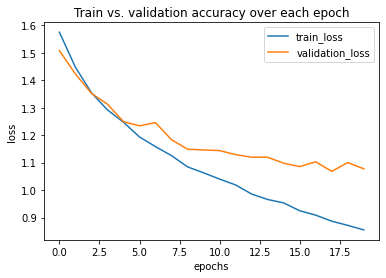

In [74]:

# trained_cnn_model = trained_cnn

hist = pd.DataFrame(trained_cnn_model.history)
fig,ax = plt.subplots()
ax.plot(hist.index, hist["loss"],label="train_loss")
ax.plot(hist.index, hist["val_loss"], label="validation_loss")
ax.set_ylabel("loss")
ax.set_xlabel("epochs")
ax.legend()
ax.set_title("Train vs. validation accuracy over each epoch")

Text(0.5, 1.0, 'Train vs. validation accuracy over each epoch')

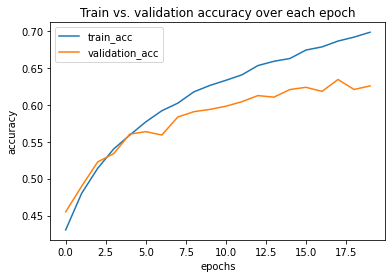

In [72]:
hist = pd.DataFrame(trained_cnn_model.history)

fig,ax2 = plt.subplots()
ax2.plot(hist.index, hist['accuracy'],label="train_acc")
ax2.plot(hist.index, hist['val_accuracy'], label = 'validation_acc')
ax2.set_ylabel('accuracy')
ax2.set_xlabel("epochs")
ax2.legend()
ax2.set_title("Train vs. validation accuracy over each epoch")

In [64]:
cnn_score = cnn.evaluate(x_test, y_test)


print("Test loss: {:.3f}".format(cnn_score[0]))
print("Test accuracy: {:.3f}".format(cnn_score[1]))

313/313 [==============================] - 5s 15ms/step - loss: 1.0963 - accuracy: 0.6250
Test loss: 1.096
Test accuracy: 0.625


3.4 Overfitting

1) To overcome overfitting, train the network again with dropout this time. For hidden layers use dropout probability of 0.3. Train the model again for 20 epochs. Report model performance on test set. 

Plot a separate plots for:

*   displaying train vs validation loss over each epoch
*   displaying train vs validation accuracy over each epoch 

2) This time, let's apply a batch normalization after every hidden layer, train the model for 20 epochs, report model performance on test set as above. 

Plot a separate plots for:

*   displaying train vs validation loss over each epoch
*   displaying train vs validation accuracy over each epoch 

3) Compare batch normalization technique with the original model and with dropout, which technique helps with overfitting better?

In [78]:
#1)
from keras.layers import Dropout

cnn_dropout = Sequential()

cnn_dropout.add(Conv2D(6, kernel_size=(5, 5), activation='relu', strides=1,input_shape=(32, 32, 3)))

cnn_dropout.add(MaxPooling2D((2, 2)))
cnn_dropout.add(Dropout(0.3))
cnn_dropout.add(Conv2D(16, (5, 5), activation='relu'))

cnn_dropout.add(MaxPooling2D((2, 2)))
cnn_dropout.add(Dropout(0.3))
cnn_dropout.add(Conv2D(120, (5, 5), activation='relu'))

cnn_dropout.add(Flatten())
cnn_dropout.add(Dropout(0.3))

cnn_dropout.add(Dense(84, activation='relu'))

cnn_dropout.add(Dense(10, activation='softmax'))

In [79]:
cnn_dropout.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

trained_cnn_dropout = cnn_dropout.fit(X_train, y_train,epochs=20, batch_size=128, verbose=0,
                                      validation_data=(X_val, y_val)
                                      )

Text(0.5, 1.0, 'Train vs. validation accuracy over each epoch with dropout')

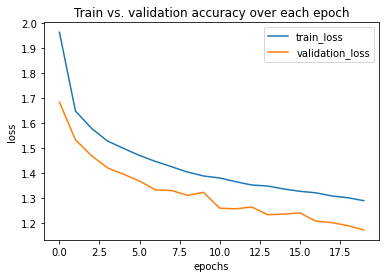

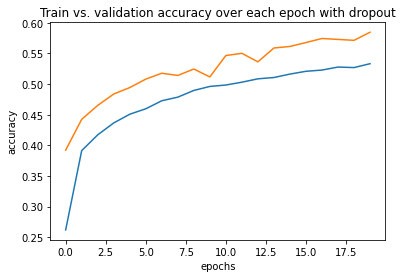

In [80]:

cnn_dropout_hist = pd.DataFrame(trained_cnn_dropout.history)
fig,ax = plt.subplots()
ax.plot(cnn_dropout_hist.index, cnn_dropout_hist["loss"],label="train_loss")
ax.plot(cnn_dropout_hist.index, cnn_dropout_hist["val_loss"], label="validation_loss")
ax.set_ylabel("loss")
ax.set_xlabel("epochs")
ax.legend()
ax.set_title("Train vs. validation accuracy over each epoch")


fig,ax2 = plt.subplots()
ax2.plot(cnn_dropout_hist.index, cnn_dropout_hist["accuracy"])
ax2.plot(cnn_dropout_hist.index, cnn_dropout_hist["val_accuracy"])
ax2.set_ylabel("accuracy")
ax2.set_xlabel("epochs")
ax2.set_title("Train vs. validation accuracy over each epoch with dropout")

In [81]:
cnn_dropout_score = cnn_dropout.evaluate(x_test, y_test, verbose=0)

print("Test loss: {:.3f}".format(cnn_dropout_score [0]))
print("Test accuracy: {:.3f}".format(cnn_dropout_score [1]))

Test loss: 1.181
Test accuracy: 0.580


In [82]:
# 2)
from keras.layers import BatchNormalization

batch_normal_cnn = Sequential()

batch_normal_cnn.add(Conv2D(6, kernel_size=(5, 5), activation='relu', strides=1,input_shape=(32, 32, 3)))

batch_normal_cnn.add(MaxPooling2D((2, 2)))
batch_normal_cnn.add(BatchNormalization())
batch_normal_cnn.add(Conv2D(16, (5, 5), activation='relu'))

batch_normal_cnn.add(MaxPooling2D((2, 2)))
batch_normal_cnn.add(BatchNormalization())
batch_normal_cnn.add(Conv2D(120, (5, 5), activation='relu'))

batch_normal_cnn.add(Flatten())
batch_normal_cnn.add(BatchNormalization())

batch_normal_cnn.add(Dense(84, activation='relu'))

batch_normal_cnn.add(Dense(10, activation='softmax'))

In [83]:
batch_normal_cnn.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])


trained_batch_normal_cnn = batch_normal_cnn.fit(X_train, y_train,epochs=20, batch_size=128, verbose=1,
                                      validation_data=(X_val, y_val)
                                      )

Epoch 1/20
313/313 [==============================] - 41s 128ms/step - loss: 1.5601 - accuracy: 0.4426 - val_loss: 2.2257 - val_accuracy: 0.2379
Epoch 2/20
313/313 [==============================] - 39s 124ms/step - loss: 1.2294 - accuracy: 0.5626 - val_loss: 1.2812 - val_accuracy: 0.5490
Epoch 3/20
313/313 [==============================] - 37s 119ms/step - loss: 1.0977 - accuracy: 0.6117 - val_loss: 1.2955 - val_accuracy: 0.5493
Epoch 4/20
313/313 [==============================] - 36s 115ms/step - loss: 1.0127 - accuracy: 0.6408 - val_loss: 1.1498 - val_accuracy: 0.6041
Epoch 5/20
313/313 [==============================] - 36s 114ms/step - loss: 0.9422 - accuracy: 0.6666 - val_loss: 1.3298 - val_accuracy: 0.5482
Epoch 6/20
313/313 [==============================] - 36s 114ms/step - loss: 0.8866 - accuracy: 0.6872 - val_loss: 1.2581 - val_accuracy: 0.5665
Epoch 7/20
313/313 [==============================] - 37s 118ms/step - loss: 0.8276 - accuracy: 0.7076 - val_loss: 1.1743 - val_ac

Text(0.5, 1.0, 'Train vs. validation accuracy over each epoch')

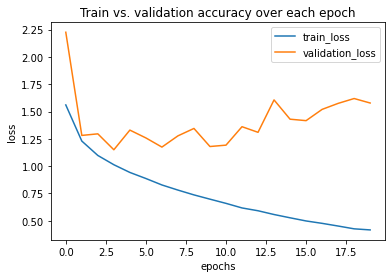

In [87]:
batch_normal_cnn_hist = pd.DataFrame(trained_batch_normal_cnn.history)
fig,ax = plt.subplots()
ax.plot(batch_normal_cnn_hist.index, batch_normal_cnn_hist["loss"],label="train_loss")
ax.plot(batch_normal_cnn_hist.index, batch_normal_cnn_hist["val_loss"], label="validation_loss")
ax.set_ylabel("loss")
ax.set_xlabel("epochs")
ax.legend()
ax.set_title("Train vs. validation accuracy over each epoch")



Text(0.5, 1.0, 'Train vs. validation accuracy over each epoch with dropout')

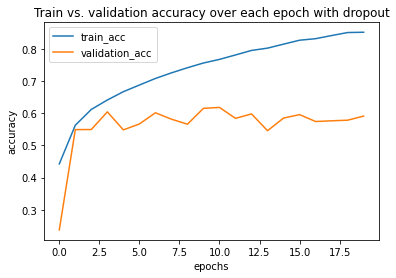

In [90]:

fig,ax2 = plt.subplots()
ax2.plot(batch_normal_cnn_hist.index, batch_normal_cnn_hist["accuracy"],label="train_acc")
ax2.plot(batch_normal_cnn_hist.index, batch_normal_cnn_hist["val_accuracy"], label = 'validation_acc')
ax2.set_ylabel("accuracy")
ax2.set_xlabel("epochs")
ax2.legend()
ax2.set_title("Train vs. validation accuracy over each epoch with dropout")

In [85]:
batch_normal_cnn_score = batch_normal_cnn.evaluate(x_test, y_test, verbose=0)

print("Test loss: {:.3f}".format(batch_normal_cnn_score[0]))
print("Test accuracy: {:.3f}".format(batch_normal_cnn_score[1]))

Test loss: 1.586
Test accuracy: 0.589


The test accuracy for the batch model is the best among the three models. 



